# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris.
When it was opened after his death, the will caused a lot of controversy,
as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow
“prizes to those who, during the preceding year, have conferred the greatest
benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories
chemistry, literature, physics, physiology or medicine, economics, and peace.

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates.
What can we learn about the Nobel Prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly.
If you're working in Google Colab, uncomment the line below, run the cell,
and restart your notebook server.

In [1]:
# %pip install --upgrade plotly

### Import Statements

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# I don't know why it's greyed out!?

plt.style.use({'figure.facecolor':'white'})

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

In [5]:
df_data

year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
957  2020    Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020       Peace                      The Nobel Peace Prize 2020   
959  2020     Physics                 The Nobel Prize in Physics 2020   
960  2020     Physics                 The Nobel Prize in Physics 2020   
961  2020     Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
0    "in recognition of the extraordinary services ...         1/1   
1    "in special recognition of his poetic composit...         1/1   
2    "for his work on serum therapy, especially its...         1/1   
3                                                  NaN         1/2   
4                                                  NaN         1/2   
..                                                 ...         ...   
957           “for the discovery of Hepatitis C virus”         1/3   
958  “for its efforts to combat hunger, for its con...         1/1   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                     full_name  birth_date  \
0      Individual  Jacobus Henricus van 't Hoff  1852-08-30   
1      Individual               Sully Prudhomme  1839-03-16   
2      Individual        Emil Adolf von Behring  1854-03-15   
3      Individual                Frédéric Passy  1822-05-20   
4      Individual             Jean Henry Dunant  1828-05-08   
..            ...                           ...         ...   
957    Individual              Michael Houghton  1949-07-02   
958  Organization    World Food Programme (WFP)         NaN   
959    Individual                   Andrea Ghez  1965-06-16   
960    Individual               Reinhard Genzel  1952-03-24   
961    Individual                 Roger Penrose  1931-08-08   

                   birth_city             birth_country  \
0                   Rotterdam               Netherlands   
1                       Paris                    France   
2           Hansdorf (Lawice)          Prussia (Poland)   
3                       Paris                    France   
4                      Geneva               Switzerland   
..                        ...                       ...   
957                       NaN            United Kingdom   
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
0                 Netherlands    Male         Berlin University   
1                      France    Male                       NaN   
2                      Poland    Male        Marburg University   
3                      France    Male                       NaN   
4                 Switzerland    Male                       NaN   
..                        ...     ...                       ...   
957            United Kingdom    Male     University of Alberta   
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany    Male  University of California   
961            United Kingdom    Male      University of Oxford   

    organization

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan,
and Nadia Murad are unknown. I've substituted them with mid-year estimate
of July 2nd.


# Data Exploration & Cleaning

**Challenge**: <br>
Preliminary data exploration.
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel Prize first awarded?
* Which year is the latest year included in the dataset?

In [6]:
num_rows = df_data.shape[0]
num_cols = df_data.shape[1]
col_names = df_data.columns
first_year = df_data['year'].values.min()
last_year = df_data['year'].values.max()

print(f"Number of rows = {num_rows} \n"
      f"Number of columns = {num_cols} \n"
      f"Column names = {list(col_names)} \n"
      f"Year of the first award = {first_year} \n"
      f"Year of the last award = {last_year}")

Number of rows = 962 
Number of columns = 16 
Column names = ['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_type', 'full_name', 'birth_date', 'birth_city', 'birth_country', 'birth_country_current', 'sex', 'organization_name', 'organization_city', 'organization_country', 'ISO'] 
Year of the first award = 1901 
Year of the last award = 2020


**Challenge**:
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [7]:
df_data

year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
957  2020    Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020       Peace                      The Nobel Peace Prize 2020   
959  2020     Physics                 The Nobel Prize in Physics 2020   
960  2020     Physics                 The Nobel Prize in Physics 2020   
961  2020     Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
0    "in recognition of the extraordinary services ...         1/1   
1    "in special recognition of his poetic composit...         1/1   
2    "for his work on serum therapy, especially its...         1/1   
3                                                  NaN         1/2   
4                                                  NaN         1/2   
..                                                 ...         ...   
957           “for the discovery of Hepatitis C virus”         1/3   
958  “for its efforts to combat hunger, for its con...         1/1   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                     full_name  birth_date  \
0      Individual  Jacobus Henricus van 't Hoff  1852-08-30   
1      Individual               Sully Prudhomme  1839-03-16   
2      Individual        Emil Adolf von Behring  1854-03-15   
3      Individual                Frédéric Passy  1822-05-20   
4      Individual             Jean Henry Dunant  1828-05-08   
..            ...                           ...         ...   
957    Individual              Michael Houghton  1949-07-02   
958  Organization    World Food Programme (WFP)         NaN   
959    Individual                   Andrea Ghez  1965-06-16   
960    Individual               Reinhard Genzel  1952-03-24   
961    Individual                 Roger Penrose  1931-08-08   

                   birth_city             birth_country  \
0                   Rotterdam               Netherlands   
1                       Paris                    France   
2           Hansdorf (Lawice)          Prussia (Poland)   
3                       Paris                    France   
4                      Geneva               Switzerland   
..                        ...                       ...   
957                       NaN            United Kingdom   
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
0                 Netherlands    Male         Berlin University   
1                      France    Male                       NaN   
2                      Poland    Male        Marburg University   
3                      France    Male                       NaN   
4                 Switzerland    Male                       NaN   
..                        ...     ...                       ...   
957            United Kingdom    Male     University of Alberta   
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany    Male  University of California   
961            United Kingdom    Male      University of Oxford   

    organization

In [8]:
is_duplicates = df_data.duplicated().values.any()
print(f"There are duplicates: {is_duplicates}")

There are duplicates: False


### Check for NaN Values

In [9]:
is_nan = df_data.isna().values.any()
print(f"There are duplicates: {is_nan}")

There are duplicates: True


In [10]:
for col in col_names:
    if df_data[col].isna().values.any():
        num_nan = df_data[col].isna().sum()
        print(f"{col}, {num_nan}")

motivation, 88
birth_date, 28
birth_city, 31
birth_country, 28
birth_country_current, 28
sex, 28
organization_name, 255
organization_city, 255
organization_country, 254
ISO, 28


In [11]:
df_data.loc[df_data['birth_date'].isna()][['year', 'category', 'laureate_type',
                                           'birth_date', 'full_name',
                                           'organization_name']]

year category laureate_type birth_date  \
24   1904    Peace  Organization        NaN   
60   1910    Peace  Organization        NaN   
89   1917    Peace  Organization        NaN   
200  1938    Peace  Organization        NaN   
215  1944    Peace  Organization        NaN   
237  1947    Peace  Organization        NaN   
238  1947    Peace  Organization        NaN   
283  1954    Peace  Organization        NaN   
348  1963    Peace  Organization        NaN   
349  1963    Peace  Organization        NaN   
366  1965    Peace  Organization        NaN   
399  1969    Peace  Organization        NaN   
479  1977    Peace  Organization        NaN   
523  1981    Peace  Organization        NaN   
558  1985    Peace  Organization        NaN   
588  1988    Peace  Organization        NaN   
659  1995    Peace  Organization        NaN   
682  1997    Peace  Organization        NaN   
703  1999    Peace  Organization        NaN   
730  2001    Peace  Organization        NaN   
778  2005    Peace  Organization        NaN   
788  2006    Peace  Organization        NaN   
801  2007    Peace  Organization        NaN   
860  2012    Peace  Organization        NaN   
873  2013    Peace  Organization        NaN   
897  2015    Peace  Organization        NaN   
919  2017    Peace  Organization        NaN   
958  2020    Peace  Organization        NaN   

                                             full_name organization_name  
24   Institut de droit international (Institute of ...               NaN  
60   Bureau international permanent de la Paix (Per...               NaN  
89   Comité international de la Croix Rouge (Intern...               NaN  
200  Office international Nansen pour les Réfugiés ...               NaN  
215  Comité international de la Croix Rouge (Intern...               NaN  
237   American Friends Service Committee (The Quakers)               NaN  
238              Friends Service Council (The Quakers)               NaN  
283  Office of the United Nations High Commissioner...               NaN  
348  Comité international de la Croix Rouge (Intern...               NaN  
349  Ligue des Sociétés de la Croix-Rouge (League o...               NaN  
366            United Nations Children's Fund (UNICEF)               NaN  
399         International Labour Organization (I.L.O.)               NaN  
479                              Amnesty International               NaN  
523  Office of the United Nations High Commissioner...               NaN  
558  International Physicians for the Prevention of...               NaN  
588                 United Nations Peacekeeping Forces               NaN  
659   Pugwash Conferences on Science and World Affairs               NaN  
682     International Campaign to Ban Landmines (ICBL)               NaN  
703                           Médecins Sans Frontières               NaN  
730                              United Nations (U.N.)               NaN  
778          International Atomic Energy Agency (IAEA)               NaN  
788                                       Grameen Bank               NaN  
801   Intergovernmental Panel on Climate Change (IPCC)               NaN  
860                                European Union (EU)               NaN  
873  Organisation for the Prohibition of Chemical W...               NaN  
897                          National Dialogue Quartet               NaN  
919  International Campaign to Abolish Nuclear Weap...               NaN  
958                         World Food Programme (WFP)               NaN

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a
percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [12]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name  birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme  1839-03-16              Paris   
2    Individual        Emil Adolf von Behring  1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy  1822-05-20              Paris   
4    Individual             Jean Henry Dunant  1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD  
1               NaN                  NaN  FRA  
2           Marburg              Germany  POL  
3               NaN                  NaN  FRA  
4               NaN                  NaN  CHE

In [13]:
df_data['birth_date'] = pd.to_datetime(df_data['birth_date'])

#### Add a Column with the Prize Share as a Percentage

In [14]:
separated_values = df_data['prize_share'].str.split('/', expand=True)
numerator = pd.to_numeric(separated_values[0])
denomenator = pd.to_numeric(separated_values[1])

share_pct = numerator / denomenator

In [15]:
df_data.insert(5, 'share_pct', share_pct)
df_data

year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
957  2020    Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020       Peace                      The Nobel Peace Prize 2020   
959  2020     Physics                 The Nobel Prize in Physics 2020   
960  2020     Physics                 The Nobel Prize in Physics 2020   
961  2020     Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  share_pct  \
0    "in recognition of the extraordinary services ...         1/1       1.00   
1    "in special recognition of his poetic composit...         1/1       1.00   
2    "for his work on serum therapy, especially its...         1/1       1.00   
3                                                  NaN         1/2       0.50   
4                                                  NaN         1/2       0.50   
..                                                 ...         ...        ...   
957           “for the discovery of Hepatitis C virus”         1/3       0.33   
958  “for its efforts to combat hunger, for its con...         1/1       1.00   
959  “for the discovery of a supermassive compact o...         1/4       0.25   
960  “for the discovery of a supermassive compact o...         1/4       0.25   
961  “for the discovery that black hole formation i...         1/2       0.50   

    laureate_type                     full_name birth_date  \
0      Individual  Jacobus Henricus van 't Hoff 1852-08-30   
1      Individual               Sully Prudhomme 1839-03-16   
2      Individual        Emil Adolf von Behring 1854-03-15   
3      Individual                Frédéric Passy 1822-05-20   
4      Individual             Jean Henry Dunant 1828-05-08   
..            ...                           ...        ...   
957    Individual              Michael Houghton 1949-07-02   
958  Organization    World Food Programme (WFP)        NaT   
959    Individual                   Andrea Ghez 1965-06-16   
960    Individual               Reinhard Genzel 1952-03-24   
961    Individual                 Roger Penrose 1931-08-08   

                   birth_city             birth_country  \
0                   Rotterdam               Netherlands   
1                       Paris                    France   
2           Hansdorf (Lawice)          Prussia (Poland)   
3                       Paris                    France   
4                      Geneva               Switzerland   
..                        ...                       ...   
957                       NaN            United Kingdom   
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
0                 Netherlands    Male         Berlin University   
1                      France    Male                       NaN   
2                      Poland    Male        Marburg University   
3                      France    Male                       NaN   
4                 Switzerland    Male                       NaN   
..                        ...     ...                       ...   
957            United Kingdom    Male     University of Alberta   
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany  

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: <br>
Create a [donut chart using plotly](https://plotly.com/python/pie-charts/)
which shows how many prizes went to men compared to how many prizes went to
women.
What percentage of all the prizes went to women?

In [16]:
import plotly.express as px

In [17]:
biology = df_data['sex'].value_counts()

donut = px.pie(names=biology.index,
               values=biology.values,
               title='Men vs. Women',
               hole=0.5)
donut.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: <br>
* What are the names of the first 3 female Nobel laureates? 
* What did they win the prize for?
* What do you see in their `birth_country`?
* Were they part of an organisation?

In [18]:
women = df_data[df_data['sex'] == 'Female']
three_women = women[:3]
three_women[['full_name', 'prize', 'birth_country', 'organization_name']]

full_name  \
18                        Marie Curie, née Sklodowska   
29  Baroness Bertha Sophie Felicita von Suttner, n...   
51                      Selma Ottilia Lovisa Lagerlöf   

                                 prize                     birth_country  \
18     The Nobel Prize in Physics 1903           Russian Empire (Poland)   
29          The Nobel Peace Prize 1905  Austrian Empire (Czech Republic)   
51  The Nobel Prize in Literature 1909                            Sweden   

   organization_name  
18               NaN  
29               NaN  
51               NaN

# Find the Repeat Winners

**Challenge**: <br>
Did some people get a Nobel Prize more than once? <br>
If so, who were they?

In [19]:
multiple_win = df_data[df_data['full_name'].duplicated(keep=False)]
multiple_win

year   category                              prize  \
18   1903    Physics    The Nobel Prize in Physics 1903   
62   1911  Chemistry  The Nobel Prize in Chemistry 1911   
89   1917      Peace         The Nobel Peace Prize 1917   
215  1944      Peace         The Nobel Peace Prize 1944   
278  1954  Chemistry  The Nobel Prize in Chemistry 1954   
283  1954      Peace         The Nobel Peace Prize 1954   
297  1956    Physics    The Nobel Prize in Physics 1956   
306  1958  Chemistry  The Nobel Prize in Chemistry 1958   
340  1962      Peace         The Nobel Peace Prize 1962   
348  1963      Peace         The Nobel Peace Prize 1963   
424  1972    Physics    The Nobel Prize in Physics 1972   
505  1980  Chemistry  The Nobel Prize in Chemistry 1980   
523  1981      Peace         The Nobel Peace Prize 1981   

                                            motivation prize_share  share_pct  \
18   "in recognition of the extraordinary services ...         1/4       0.25   
62   "in recognition of her services to the advance...         1/1       1.00   
89                                                 NaN         1/1       1.00   
215                                                NaN         1/1       1.00   
278  "for his research into the nature of the chemi...         1/1       1.00   
283                                                NaN         1/1       1.00   
297  "for their researches on semiconductors and th...         1/3       0.33   
306  "for his work on the structure of proteins, es...         1/1       1.00   
340                                                NaN         1/1       1.00   
348                                                NaN         1/2       0.50   
424  "for their jointly developed theory of superco...         1/3       0.33   
505  "for their contributions concerning the determ...         1/4       0.25   
523                                                NaN         1/1       1.00   

    laureate_type                                          full_name  \
18     Individual                        Marie Curie, née Sklodowska   
62     Individual                        Marie Curie, née Sklodowska   
89   Organization  Comité international de la Croix Rouge (Intern...   
215  Organization  Comité international de la Croix Rouge (Intern...   
278    Individual                                 Linus Carl Pauling   
283  Organization  Office of the United Nations High Commissioner...   
297    Individual                                       John Bardeen   
306    Individual                                   Frederick Sanger   
340    Individual                                 Linus Carl Pauling   
348  Organization  Comité international de la Croix Rouge (Intern...   
424    Individual                                       John Bardeen   
505    Individual                                   Frederick Sanger   
523  Organization  Office of the United Nations High Commissioner...   

    birth_date    birth_city             birth_country  \
18  1867-11-07        Warsaw   Russian Empire (Poland)   
62  1867-11-07        Warsaw   Russian Empire (Poland)   
89         NaT           NaN                       NaN   
215        NaT           NaN                       NaN   
278 1901-02-28  Portland, OR  United States of America   
283        NaT           NaN                       NaN   
297 1908-05-23   Madison, WI  United States of America   
306 1918-08-13     Rendcombe            United Kingdom   
340 1901-02-28  Portland, OR  United States of America   
348        NaT           NaN                       NaN   
424 1908-05-23   Madison, WI  United States of America   
505 1918-08-13     Rendcombe            United Kingdom   
523        NaT           NaN                       NaN   

        birth_country_current     sex  \
18                     Poland  Female   
62                     Poland  Female   
89                        NaN     NaN   
215                       NaN     NaN   
278  United Stat

# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by a category.
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a
color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [20]:
category_value_count = df_data['category'].value_counts()
num_cat = df_data['category'].nunique()
num_cat

6

In [21]:
cat_bar = px.bar(x=category_value_count.index,
                 y=category_value_count.values,
                 title='Number of Prizes per category',
                 color=category_value_count.values,
                 color_continuous_scale='Aggrnyl')
cat_bar.update_layout(xaxis_title='Nobel Prize Category',
                      yaxis_title='Number of prizes',
                      coloraxis_showscale=False)
cat_bar.show()

In [22]:
category_value_count

Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: category, dtype: int64

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [23]:
economics_first_award = df_data[df_data['category'] == 'Economics'].sort_values(
    'year', ascending=True)[:1]
economics_first_award

year   category                                              prize  \
393  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  share_pct  \
393  "for having developed and applied dynamic mode...         1/2       0.50   

    laureate_type      full_name birth_date birth_city birth_country  \
393    Individual  Jan Tinbergen 1903-04-12  the Hague   Netherlands   

    birth_country_current   sex                    organization_name  \
393           Netherlands  Male  The Netherlands School of Economics   

    organization_city organization_country  ISO  
393         Rotterdam          Netherlands  NLD

In [24]:
print(f"The first economic award went to: "
      f"{economics_first_award['full_name'].values[0]}")

The first economic award went to: Jan Tinbergen


# Male and Female Winners by Category

**Challenge**: <br>
Create a [plotly bar chart](https://plotly.com/python/bar-charts/)
that shows the split between men and women by a category.
* Hover over the bar chart. How many prizes went to women in Literature compared
to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [25]:
cat_men_women = df_data.groupby(['category', 'sex'], as_index=False).\
    agg({'prize': pd.Series.count})
cat_men_women

category     sex  prize
0    Chemistry  Female      7
1    Chemistry    Male    179
2    Economics  Female      2
3    Economics    Male     84
4   Literature  Female     16
5   Literature    Male    101
6     Medicine  Female     12
7     Medicine    Male    210
8        Peace  Female     17
9        Peace    Male     90
10     Physics  Female      4
11     Physics    Male    212

In [26]:
cat_sex = px.bar(x=cat_men_women['category'],
                 y=cat_men_women['prize'],
                 color=cat_men_women['sex'],
                 # barmode='group',
                 title='Number of Prizes per category based on sex'
)
cat_sex.update_layout(xaxis_title='Nobel Prize Category',
                      yaxis_title='Number of Prizes')
cat_sex.show()

# Number of Prizes Awarded Over Time

**Challenge**: <br>
Are more prizes awarded recently than when the prize was first created? <br>
Show the trend in awards visually.
* Count the number of prizes awarded every year. 
* Create a 5-year rolling average of the number of prizes <br>
(Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. <br>
(Hint: you'll need to use NumPy).

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](
https://matplotlib.org/3.1.0/gallery/color/named_colors.html)
to draw the data points in `dogerblue` while the rolling average is coloured
in `crimson`.

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on
the number of prizes being given out?
* What could be the reason for the trend in the chart?


In [27]:
prizes_per_year = df_data.groupby('year').\
    agg({'prize': pd.Series.count})
prizes_per_year

prize
year       
1901      6
1902      7
1903      7
1904      6
1905      5
...     ...
2016     11
2017     12
2018     13
2019     14
2020     12

[117 rows x 1 columns]

In [28]:
rolling_avg = prizes_per_year.rolling(5).mean()
rolling_avg

prize
year       
1901    nan
1902    nan
1903    nan
1904    nan
1905   6.20
...     ...
2016  11.60
2017  12.00
2018  12.00
2019  12.20
2020  12.40

[117 rows x 1 columns]

In [29]:
plt.figure(figsize=(16,8), dpi=300)
plt.title('Number of Nobel Prizes per Year', fontsize=18)

plt.xticks(ticks=np.arange(1900, 2021, 5),
           fontsize=14,
           rotation=45)
plt.yticks(fontsize=14)

ax = plt.gca()
ax.set_xlim(1900, 2020)

ax.scatter(x=prizes_per_year.index,
            y=prizes_per_year.values,
            color='dodgerblue',
            label='Data Points',
            alpha=0.7)

ax.plot(rolling_avg.index,
        rolling_avg.values,
        color='crimson',
        label='Rolling Average')

ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Number of Prizes Awarded', fontsize=14)

plt.legend(loc='best', fontsize=14)
plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: <br>
Investigate if more prizes are shared than before.

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5-year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [30]:
avg_share_per_year = df_data.groupby('year').agg({'share_pct': pd.Series.mean})
avg_share_per_year

share_pct
year           
1901       0.83
1902       0.71
1903       0.71
1904       0.83
1905       1.00
...         ...
2016       0.55
2017       0.50
2018       0.46
2019       0.43
2020       0.50

[117 rows x 1 columns]

In [31]:
rolling_avg_share = avg_share_per_year.rolling(5).mean()
rolling_avg_share

share_pct
year           
1901        nan
1902        nan
1903        nan
1904        nan
1905       0.82
...         ...
2016       0.52
2017       0.50
2018       0.50
2019       0.50
2020       0.49

[117 rows x 1 columns]

In [32]:
plt.figure(figsize=(16,8), dpi=300)
plt.title('Number of Nobel Prizes per Year', fontsize=18)

plt.xticks(ticks=np.arange(1900, 2021, 5),
           fontsize=14,
           rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlim(1900, 2020)

ax1.scatter(x=prizes_per_year.index,
            y=prizes_per_year.values,
            color='dodgerblue',
            label='Data Points',
            alpha=0.7)

ax1.plot(rolling_avg.index,
        rolling_avg.values,
        color='crimson',
        label='Rolling Average Prize Number')

ax2.plot(rolling_avg_share.index,
         rolling_avg_share.values,
         color='green',
         label='Rolling Average Shares')

ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Number of Prizes Awarded', fontsize=14, color='crimson')
ax2.set_ylabel('Shares - percentage', fontsize=14, color='green')
ax2.set_ylim(0, 1)

ax2.invert_yaxis() # Invert a secondary y-axis (it has to be after setting y-lim)

plt.legend(loc='best', fontsize=14)
plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns.
The `prize` column should contain the total number of prizes won.

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or
`organization_country`?
* What are some potential problems when using `birth_country` or any of the
others? <br>
Which column is the least problematic?
* Then use plotly to create a horizontal bar chart showing the number of prizes
won by each country. <br>
Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [33]:
top20_countries = df_data.groupby('birth_country_current', as_index=False).agg(
    {'prize': pd.Series.count}).sort_values('prize')
top20_countries

birth_country_current  prize
78                  Zimbabwe      1
77                     Yemen      1
32                   Iceland      1
41                     Kenya      1
29         Guadeloupe Island      1
..                       ...    ...
67                    Sweden     29
25                    France     57
26                   Germany     84
73            United Kingdom    105
74  United States of America    281

[79 rows x 2 columns]

In [34]:
country_bar = px.bar(top20_countries[-20:],
                    x='prize',
                     y='birth_country_current',
                     title='Top 20 Countries by Number of Prizes',
                     orientation='h',
                     color='prize')
country_bar.update_layout(xaxis_title='Number of Prizes',
                          yaxis_title='Country')
country_bar.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using
[the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with
[plotly's available colours](https://plotly.com/python/builtin-colorscales/).
I quite like the sequential colour `matter` on this map.

Hint: <br>
You'll need to use a 3-letter country code for each country.

In [35]:
df_countries = df_data.groupby(['birth_country_current', 'ISO'],
                               as_index=False).agg({'prize': pd.Series.count})
df_countries

birth_country_current  ISO  prize
0                    Algeria  DZA      2
1                  Argentina  ARG      4
2                  Australia  AUS     10
3                    Austria  AUT     18
4                 Azerbaijan  AZE      1
..                       ...  ...    ...
74  United States of America  USA    281
75                 Venezuela  VEN      1
76                   Vietnam  VNM      1
77                     Yemen  YEM      1
78                  Zimbabwe  ZWE      1

[79 rows x 3 columns]

In [36]:
world_map = px.choropleth(df_countries,
                          locations='ISO',
                          hover_name='birth_country_current',
                          color='prize',
                          color_continuous_scale=px.colors.sequential.matter)

world_map.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: <br>
See if you can divide up the plotly bar chart you created above to show which
categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to
the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's Nobel Prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France?
What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: <br>
Take a two-step approach.
The first step is grouping the data by country and category.
Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [37]:
category_country_prizes = df_data.groupby(['birth_country_current', 'category'],
                                          as_index=False).\
    agg({'prize': pd.Series.count})
category_country_prizes.sort_values('prize', ascending=False, inplace=True)
category_country_prizes

birth_country_current   category  prize
204  United States of America   Medicine     78
206  United States of America    Physics     70
201  United States of America  Chemistry     55
202  United States of America  Economics     49
198            United Kingdom   Medicine     28
..                        ...        ...    ...
97                       Iraq      Peace      1
99                    Ireland   Medicine      1
100                   Ireland    Physics      1
102                    Israel  Economics      1
210                  Zimbabwe      Peace      1

[211 rows x 3 columns]

In [38]:
ccp_bar = px.bar(category_country_prizes[:50],
                 x='prize',
                 y='birth_country_current',
                 color='category',
                 title='Country Bar Chart with Prize Category')

# Reverse y-axis
ccp_bar['layout']['yaxis']['autorange'] = "reversed"

ccp_bar.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number
of prizes won?
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year.
Again, use the `birth_country_current` of the winner to calculate this.
* Create a [plotly line chart](https://plotly.com/python/line-charts/)
where each country is a coloured line.

In [39]:
country_year_prize = df_data.groupby(['birth_country_current', 'year'],
                                     as_index=False).\
    agg({'prize': pd.Series.count})
country_year_prize.sort_values(['birth_country_current', 'year'], inplace=True)
country_year_prize

birth_country_current  year  prize
0                     Algeria  1957      1
1                     Algeria  1997      1
2                   Argentina  1936      1
3                   Argentina  1947      1
4                   Argentina  1980      1
..                        ...   ...    ...
622  United States of America  2020      7
623                 Venezuela  1980      1
624                   Vietnam  1973      1
625                     Yemen  2011      1
626                  Zimbabwe  1960      1

[627 rows x 3 columns]

In [40]:
country_year_prize['cumul_prize'] = country_year_prize.\
    groupby('birth_country_current')['prize'].apply(lambda x: x.cumsum())
country_year_prize

birth_country_current  year  prize  cumul_prize
0                     Algeria  1957      1            1
1                     Algeria  1997      1            2
2                   Argentina  1936      1            1
3                   Argentina  1947      1            2
4                   Argentina  1980      1            3
..                        ...   ...    ...          ...
622  United States of America  2020      7          281
623                 Venezuela  1980      1            1
624                   Vietnam  1973      1            1
625                     Yemen  2011      1            1
626                  Zimbabwe  1960      1            1

[627 rows x 4 columns]

In [41]:
line = px.line(country_year_prize,
               x='year',
               y='cumul_prize',
               color='birth_country_current')

line.update_layout(xaxis_title='Year',
                   yaxis_title='Number of Prizes (cumulative sum)')

line.show()

# What are the Top Research Organisations?

**Challenge**: <br>
Create a bar chart showing the organisations affiliated with the Nobel laureates.
It should look something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel Prize winners are affiliated with the University of Chicago
and Harvard University?

In [42]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  share_pct  \
0  "in recognition of the extraordinary services ...         1/1       1.00   
1  "in special recognition of his poetic composit...         1/1       1.00   
2  "for his work on serum therapy, especially its...         1/1       1.00   
3                                                NaN         1/2       0.50   
4                                                NaN         1/2       0.50   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD  
1               NaN                  NaN  FRA  
2           Marburg              Germany  POL  
3               NaN                  NaN  FRA  
4               NaN                  NaN  CHE

In [43]:
top20_institutions = df_data['organization_name'].value_counts()[:20]
top20_institutions.sort_values(inplace=True)
top20_institutions

London University                                7
Harvard Medical School                           7
University College London                        7
Sorbonne University                              7
Cornell University                               8
Bell Laboratories                                8
Yale University                                  9
MRC Laboratory of Molecular Biology             10
University of Oxford                            12
Max-Planck-Institut                             13
Rockefeller University                          13
Princeton University                            15
California Institute of Technology (Caltech)    17
Columbia University                             17
University of Cambridge                         18
University of Chicago                           20
Massachusetts Institute of Technology (MIT)     21
Stanford University                             23
Harvard University                              29
University of California       

In [44]:
institution_bar = px.bar(x=top20_institutions.values,
                         y=top20_institutions.index,
                         color=top20_institutions.values,
                         title='Top 20 Research Institutions by '
                               'Number of Prizes')

institution_bar.update_layout(xaxis_title='Number of Prizes',
                              yaxis_title='Institution',
                              coloraxis_showscale=False,
                              yaxis=dict(tickmode='linear')) # Show all y-ticks
institution_bar.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of
the research institutions associated with a Nobel laureate.
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [45]:
top20_org_cities = df_data['organization_city'].value_counts()[:20]
top20_org_cities.sort_values(inplace=True)
top20_org_cities

Zurich              8
Los Angeles, CA     8
Boston, MA          9
New Haven, CT       9
Munich              9
Heidelberg          9
Moscow             10
Stockholm          10
Berlin             12
Oxford             12
Pasadena, CA       17
Princeton, NJ      19
Chicago, IL        20
Berkeley, CA       21
Stanford, CA       24
Paris              25
London             27
Cambridge          31
New York, NY       45
Cambridge, MA      50
Name: organization_city, dtype: int64

In [46]:
cities_bar = px.bar(x=top20_org_cities.values,
                    y=top20_org_cities.index,
                    color=top20_org_cities.values,
                    title='Top 20 Research Cities by Number of Prizes')

cities_bar.update_layout(xaxis_title='Number of Prizes',
                         yaxis_title='City',
                         coloraxis_showscale=False,
                         yaxis=dict(tickmode='linear')) # Show all y-ticks)
cities_bar.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in
New York?
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?

In [47]:
top20_cities = df_data['birth_city'].value_counts()[:20]
top20_cities.sort_values(inplace=True)
top20_cities

Los Angeles, CA           3
Cairo                     4
Pittsburgh, PA            4
Montreal                  4
Frankfurt-on-the-Main     5
Prague                    5
Hamburg                   6
Stockholm                 6
Moscow                    7
Munich                    7
Brooklyn, NY              8
Boston, MA                8
Washington, DC            8
Budapest                  8
Berlin                   11
Chicago, IL              12
Vienna                   14
London                   19
Paris                    26
New York, NY             53
Name: birth_city, dtype: int64

In [48]:
birth_city_bar = px.bar(x=top20_cities.values,
                        y=top20_cities.index,
                        title='Top 20 Birth Cities of Nobel Laureates',
                        color=top20_cities.values,
                        color_continuous_scale=px.colors.sequential.Plasma)

birth_city_bar.update_layout(xaxis_title='Number of Prizes',
                             yaxis_title='Birth City',
                             coloraxis_showscale=False,
                             yaxis=dict(tickmode='linear')) # Show all y-ticks)
birth_city_bar.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**:
* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](
https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>

In [49]:
df_org_prizes = df_data.groupby(['organization_country',
                                 'organization_city',
                                 'organization_name'], as_index=False).\
    agg({'prize': pd.Series.count})
df_org_prizes.sort_values('prize', inplace=True)
df_org_prizes

organization_country     organization_city  \
0                   Argentina          Buenos Aires   
154            United Kingdom            Birmingham   
155            United Kingdom                Bodmin   
157            United Kingdom               Bristol   
158            United Kingdom  Bucksburn (Scotland)   
..                        ...                   ...   
195  United States of America          Berkeley, CA   
209  United States of America           Chicago, IL   
206  United States of America         Cambridge, MA   
280  United States of America          Stanford, CA   
205  United States of America         Cambridge, MA   

                               organization_name  prize  
0             Institute for Biochemical Research      1  
154                        Birmingham University      1  
155                  Glynn Research Laboratories      1  
157                           Bristol University      1  
158                    Rowett Research Institute      1  
..                                           ...    ...  
195                     University of California     19  
209                        University of Chicago     20  
206  Massachusetts Institute of Technology (MIT)     21  
280                          Stanford University     23  
205                           Harvard University     29  

[291 rows x 4 columns]

In [50]:
sunburst = px.sunburst(df_org_prizes,
                       path=['organization_country',
                             'organization_city',
                             'organization_name'],
                       values='prize',
                       title='Where do Discoveries Take Place?')

sunburst.update_layout(xaxis_title='Number of Prizes',
                       yaxis_title='City',
                       coloraxis_showscale=False)
sunburst.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: <br>
Calculate the age of the laureate in the year of the ceremony and add this as
a column called `winning_age` to the `df_data` DataFrame. <br>
Hint: <br>
You can use [this](
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html)
to help you.



In [51]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   share_pct              962 non-null    float64       
 6   laureate_type          962 non-null    object        
 7   full_name              962 non-null    object        
 8   birth_date             934 non-null    datetime64[ns]
 9   birth_city             931 non-null    object        
 10  birth_country          934 non-null    object        
 11  birth_country_current  934 non-null    object        
 12  sex                    934 non-null    object        
 13  organ

In [52]:
age = df_data['year'] - df_data['birth_date'].dt.year
df_data['winning_age'] = age
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  share_pct  \
0  "in recognition of the extraordinary services ...         1/1       1.00   
1  "in special recognition of his poetic composit...         1/1       1.00   
2  "for his work on serum therapy, especially its...         1/1       1.00   
3                                                NaN         1/2       0.50   
4                                                NaN         1/2       0.50   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  winning_age  
0            Berlin              Germany  NLD        49.00  
1               NaN                  NaN  FRA        62.00  
2           Marburg              Germany  POL        47.00  
3               NaN                  NaN  FRA        79.00  
4               NaN                  NaN  CHE        73.00

In [53]:
youngest_age = df_data['winning_age'].sort_values().min()
oldest_age = df_data['winning_age'].sort_values().max()
youngest_age, oldest_age

(17.0, 97.0)

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to
[create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html)
to visualise the distribution of laureate age at the time of winning.
Experiment with the number of `bins` to see how the visualisation changes.

In [54]:
df_data['winning_age'].describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

In [55]:
youngest_name = df_data[df_data['winning_age'] == youngest_age]['full_name'].values[0]
oldest_name = df_data[df_data['winning_age'] == oldest_age]['full_name'].values[0]
youngest_name, oldest_name

('Malala Yousafzai', 'John Goodenough')

In [56]:
youngest_prize = df_data[df_data['winning_age'] == youngest_age]['prize'].values[0]
oldest_prize = df_data[df_data['winning_age'] == oldest_age]['prize'].values[0]
youngest_prize, oldest_prize

('The Nobel Peace Prize 2014', 'The Nobel Prize in Chemistry 2019')

In [57]:
avg_win_age = df_data['winning_age'].mean()
round(avg_win_age)

60

In [58]:
age_hist = sns.histplot(df_data,
                        x='winning_age',
                        bins=16)

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? <br>
Have the ages of laureates at the time of the award increased or decreased over
time?

**Challenge**:
* Use Seaborn to
[create a .regplot](
https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot)
with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the
linear fit.
* According to the best fit line, how old were Nobel laureates in the years
1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a
Nobel laureate in 2020?


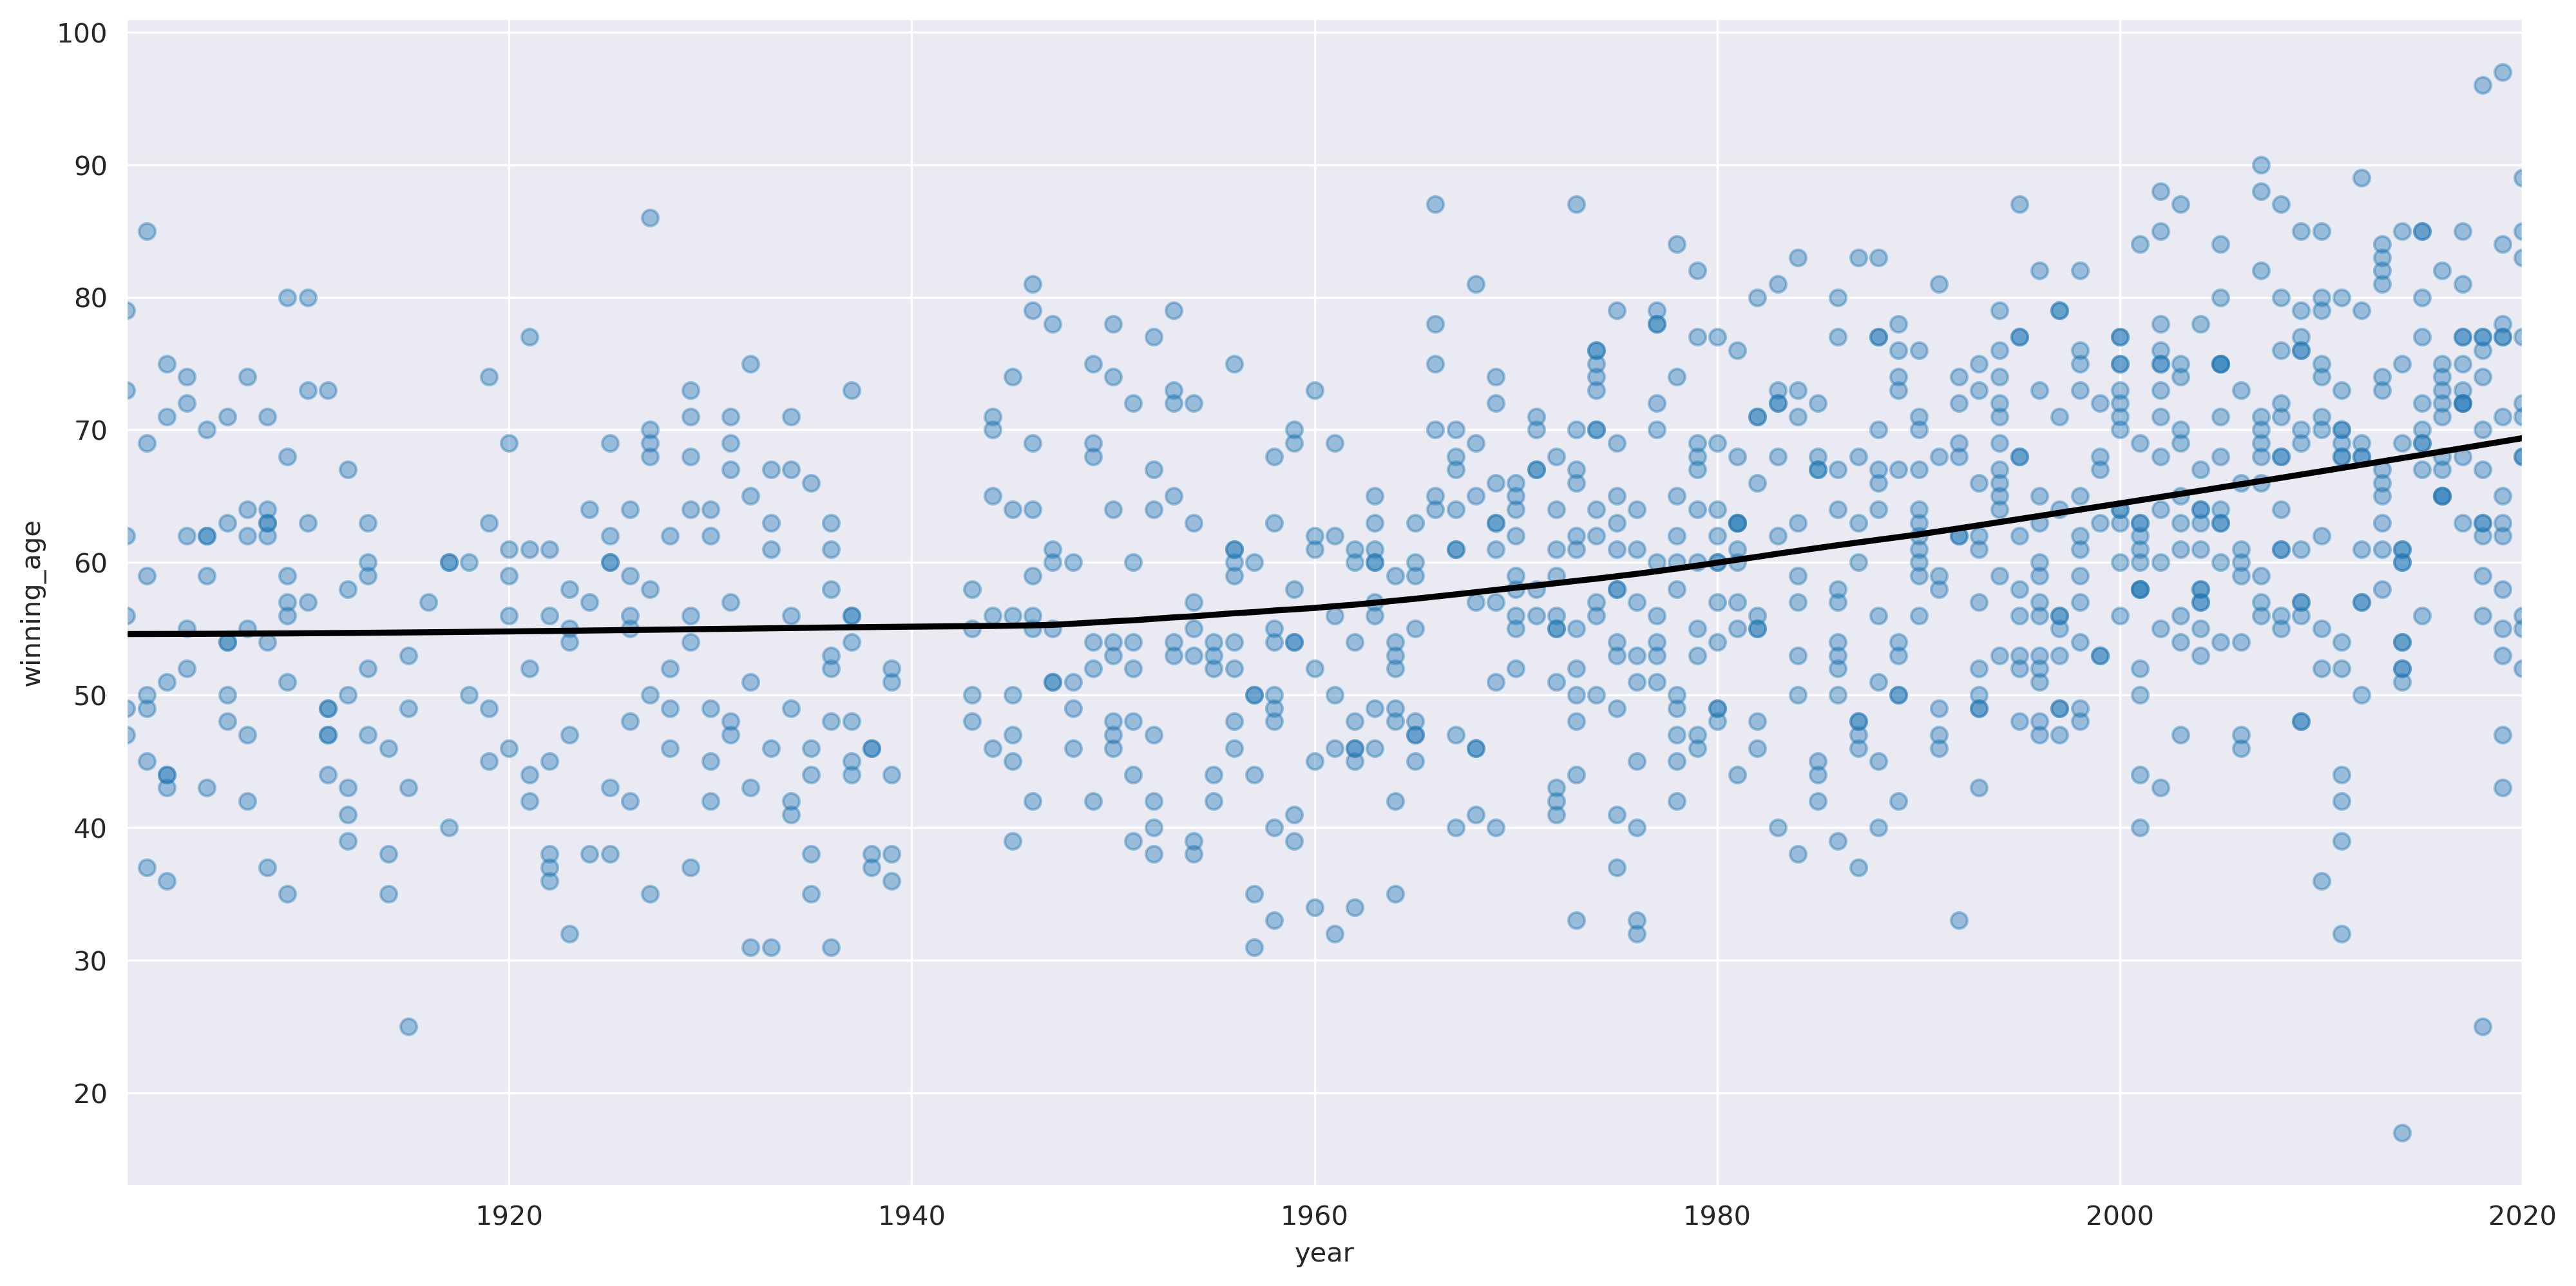

In [59]:
plt.figure(figsize=(16,8), dpi=300)

with sns.axes_style('darkgrid'):
    sns.regplot(data=df_data,
                x='year',
                y='winning_age',
                lowess=True,
                scatter_kws={'alpha': 0.4},
                line_kws={'color': 'black'})

plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by a category?

* Use Seaborn's [`.boxplot()`](
https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot)
to show how the mean, quartiles, max, and minimum values vary across categories.
<br>
Which category has the longest "whiskers"?
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

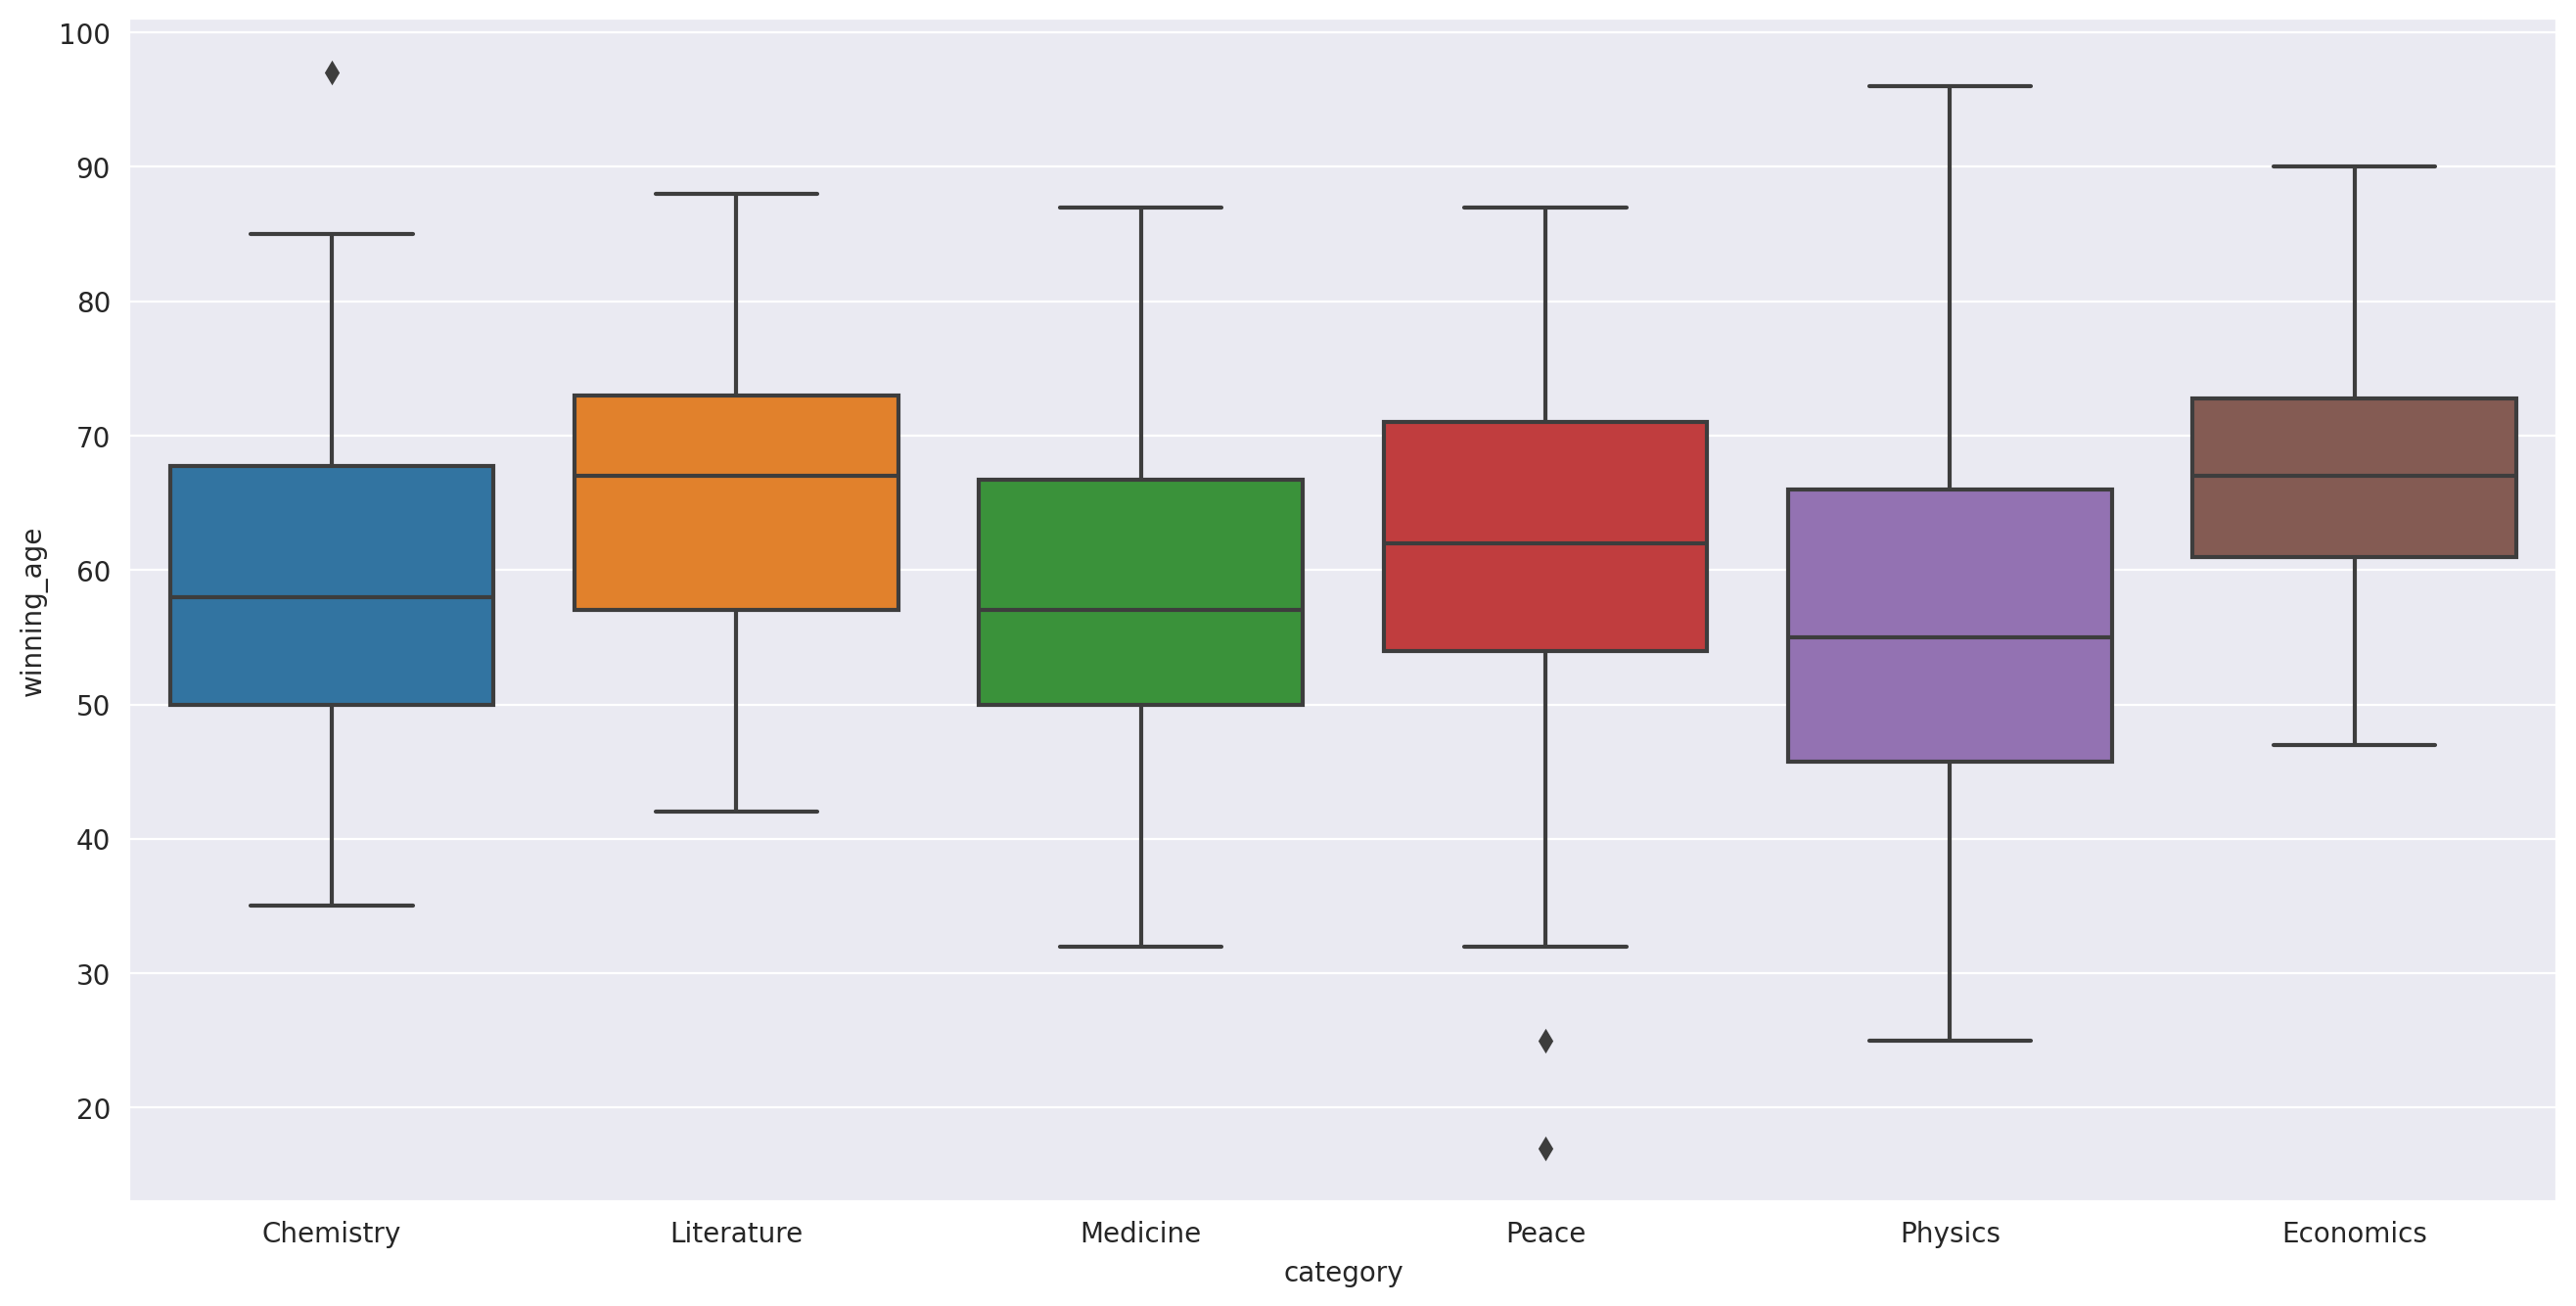

In [60]:
plt.figure(figsize=(16,8), dpi=200)

with sns.axes_style('darkgrid'):
    sns.boxplot(data=df_data,
                x='category',
                y='winning_age')

plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](
https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot)
and the `row` parameter to create 6 separate charts for each prize category.
Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all
6 categories on the same chart using the `hue` parameter.


In [ ]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
               x='year',
               y='winning_age',
               row='category', # multiple plots beneath each other
               lowess=True,
               aspect=2, # ratio width : height
               scatter_kws={'alpha': 0.4},
               line_kws={'color': 'black'})